# Stock Market Analysis of Auto Companies

This is my implementaion of the Perian Data: Python for Financial Analysis and Algorithmic trading course's Stock Market Analysis capstone project.
https://www.udemy.com/course/python-for-finance-and-trading-algorithms/

The objective of this exercise is to track and analyze stock market trends of different auto companies.

In [8]:
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas_datareader.data as web
import datetime
%matplotlib inline

print("Done")

Done


____
## Part 1: Gather Data

### Tesla Stock (Ticker: TSLA on the NASDAQ)

We will gather data for Tesla, Ford, and General Motors (GM)



In [2]:
# Gather and display tesla data

start_time = datetime.datetime(2012, 1, 1)
end_time = datetime.datetime(2017, 1, 1)

tesla_df = web.DataReader('TSLA', 'yahoo', start_time, end_time)
tesla_df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,5.900,5.530,5.788,5.616,4640500,5.616
2012-01-04,5.734,5.500,5.642,5.542,3150500,5.542
2012-01-05,5.586,5.370,5.552,5.424,5027500,5.424
2012-01-06,5.558,5.282,5.440,5.382,4931500,5.382
2012-01-09,5.498,5.224,5.400,5.450,4485000,5.450


In [3]:
# Gather and display ford data

start_time = datetime.datetime(2012, 1, 1)
end_time = datetime.datetime(2017, 1, 1)

ford_df = web.DataReader('F', 'yahoo', start_time, end_time)
ford_df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,11.25,10.99,11.00,11.13,45709900.0,7.544740
2012-01-04,11.53,11.07,11.15,11.30,79725200.0,7.659981
2012-01-05,11.63,11.24,11.33,11.59,67877500.0,7.856563
2012-01-06,11.80,11.52,11.74,11.71,59840700.0,7.937905
2012-01-09,11.95,11.70,11.83,11.80,53981500.0,7.998916


In [4]:
# Gather and display GM data

start_time = datetime.datetime(2012, 1, 1)
end_time = datetime.datetime(2017, 1, 1)

gm_df = web.DataReader('GM', 'yahoo', start_time, end_time)
gm_df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,21.180000,20.750000,20.830000,21.049999,9321300.0,16.269407
2012-01-04,21.370001,20.750000,21.049999,21.150000,7856700.0,16.346703
2012-01-05,22.290001,20.959999,21.100000,22.170000,17880600.0,17.135054
2012-01-06,23.030001,22.240000,22.260000,22.920000,18234500.0,17.714725
2012-01-09,23.430000,22.700001,23.200001,22.840000,12084500.0,17.652889


## Part 2: Visualizing the Data

We will visualize the open price for the three auto companies

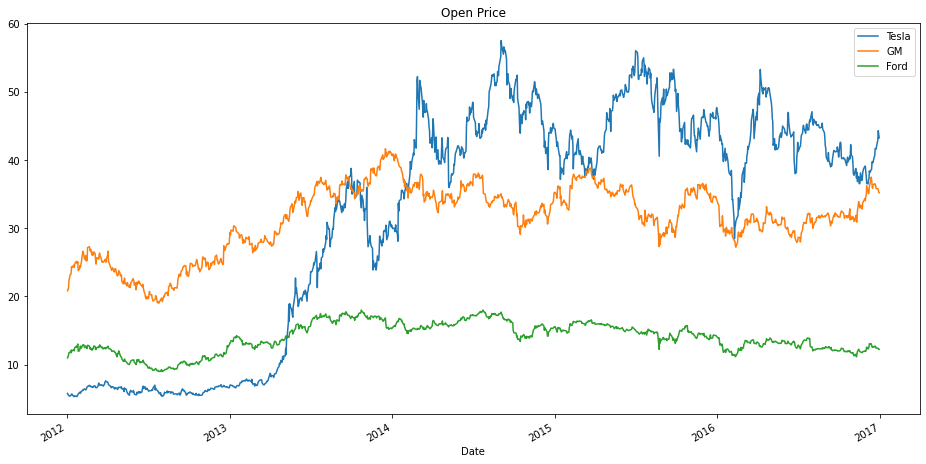

In [11]:
# Plot Open Prices
tesla_df['Open'].plot(label='Tesla',figsize=(16,8),title='Open Price')
gm_df['Open'].plot(label='GM')
ford_df['Open'].plot(label='Ford')
plt.legend()

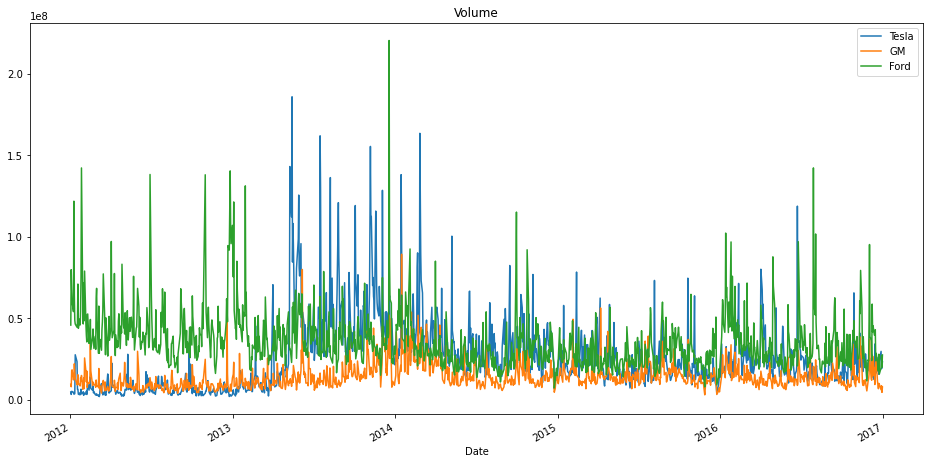

In [13]:
# Plot Volume
tesla_df['Volume'].plot(label='Tesla',figsize=(16,8),title='Volume')
gm_df['Volume'].plot(label='GM')
ford_df['Volume'].plot(label='Ford')
plt.legend()

In [14]:
# Create Total Traded Column for each company. Total traded = Open Price * Volume
tesla_df['Total Traded'] = tesla_df['Open'] * tesla_df['Volume']
ford_df['Total Traded'] = ford_df['Open'] * ford_df['Volume']
gm_df['Total Traded'] = gm_df['Open'] * gm_df['Volume']

** Plot this "Total Traded" against the time index.**

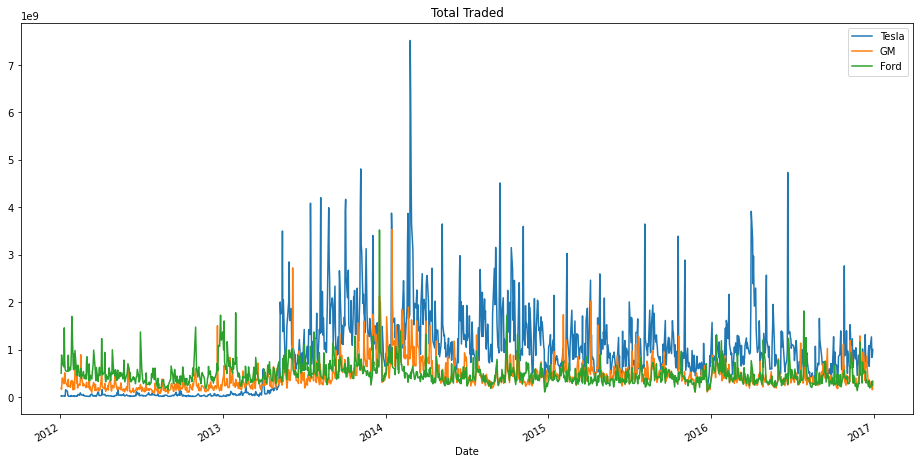

In [16]:
# Plot the Total Traded column
tesla_df['Total Traded'].plot(label='Tesla',figsize=(16,8),title='Total Traded')
gm_df['Total Traded'].plot(label='GM')
ford_df['Total Traded'].plot(label='Ford')
plt.legend()

** Let's practice plotting out some MA (Moving Averages). Plot out the MA50 and MA200 for GM. **

<AxesSubplot:xlabel='Date'>

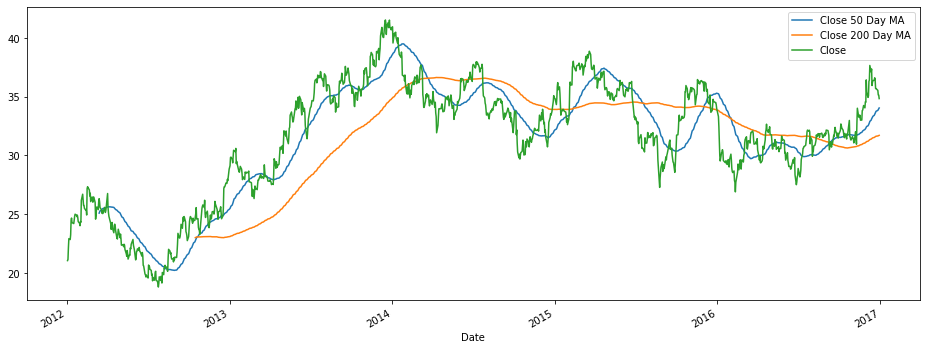

In [18]:
# Plot Moving/Rolling Averages (Closing Price) over 50 days and 200 days for GM
gm_df['Close 50 Day MA'] = gm_df.rolling(window=50).mean()['Close']
gm_df['Close 200 Day MA'] = gm_df.rolling(window=200).mean()['Close']

gm_df[['Close 50 Day MA', 'Close 200 Day MA', 'Close']].plot(figsize=(16,6))

** Finally lets see if there is a relationship between these stocks, after all, they are all related to the car industry. We can see this easily through a scatter matrix plot. Import scatter_matrix from pandas.plotting and use it to create a scatter matrix plot of all the stocks'opening price. You may need to rearrange the columns into a new single dataframe. Hints and info can be found here: https://pandas.pydata.org/pandas-docs/stable/visualization.html#scatter-matrix-plot **

____
# Part 3: Basic Financial Analysis

Now it is time to focus on a few key financial calculations. This will serve as your transition to the second half of the course. All you need to do is follow along with the instructions, this will mainly be an exercise in converting a mathematical equation or concept into code using python and pandas, something we will do often when working with quantiative data! If you feel very lost in this section, don't worry! Just go to the solutions lecture and treat it as a code-along lecture, use whatever style of learning works best for you!

Let's begin!
____

## Daily Percentage Change
First we will begin by calculating the daily percentage change. Daily percentage change is defined by the following formula:

$ r_t = \frac{p_t}{p_{t-1}} -1$

This defines r_t (return at time t) as equal to the price at time t divided by the price at time t-1 (the previous day) minus 1. Basically this just informs you of your percent gain (or loss) if you bought the stock on day and then sold it the next day. While this isn't necessarily helpful for attempting to predict future values of the stock, its very helpful in analyzing the volatility of the stock. If daily returns have a wide distribution, the stock is more volatile from one day to the next. Let's calculate the percent returns and then plot them with a histogram, and decide which stock is the most stable!

** Create a new column for each dataframe called returns. This column will be calculated from the Close price column. There are two ways to do this, either a simple calculation using the .shift() method that follows the formula above, or you can also use pandas' built in pct_change method. **

** Now plot a histogram of each companies returns. Either do them separately, or stack them on top of each other. Which stock is the most "volatile"? (as judged by the variance in the daily returns we will discuss volatility in a lot more detail in future lectures.)**

** Try also plotting a KDE instead of histograms for another view point. Which stock has the widest plot? **

** Try also creating some box plots comparing the returns. **

## Comparing Daily Returns between Stocks

** Create a scatter matrix plot to see the correlation between each of the stocks daily returns. This helps answer the questions of how related the car companies are. Is Tesla begin treated more as a technology company rather than a car company by the market?**

** It looks like Ford and GM do have some sort of possible relationship, let's plot just these two against eachother in scatter plot to view this more closely!**

____
## Cumulative Daily Returns

Great! Now we can see which stock was the most wide ranging in daily returns (you should have realized it was Tesla, our original stock price plot should have also made that obvious).

With daily cumulative returns, the question we are trying to answer is the following, if I invested $1 in the company at the beginning of the time series, how much would is be worth today? This is different than just the stock price at the current day, because it will take into account the daily returns. Keep in mind, our simple calculation here won't take into account stocks that give back a dividend. Let's look at some simple examples:

Lets us say there is a stock 'ABC' that is being actively traded on an exchange. ABC has the following prices corresponding to the dates given

    Date                        Price
    01/01/2018                   10
    01/02/2018                   15
    01/03/2018                   20
    01/04/2018                   25

**Daily Return** : Daily return is the profit/loss made by the stock compared to the previous day. (This is what ew just calculated above). A value above one indicates profit, similarly a value below one indicates loss. It is also expressed in percentage to convey the information better. (When expressed as percentage, if the value is above 0, the stock had give you profit else loss). So for the above example the daily returns would be

    Date                         Daily Return                  %Daily Return
    01/01/2018                 10/10 =  1                          -   
    01/02/2018                 15/10 =  3/2                       50%
    01/03/2018                 20/15 =  4/3                       33%
    01/04/2018                 25/20 =  5/4                       20%

**Cumulative Return**: While daily returns are useful, it doesn't give the investor a immediate insight into the gains he had made till date, especially if the stock is very volatile. Cumulative return is computed relative to the day investment is made.  If cumulative return is above one, you are making profits else you are in loss. So for the above example cumulative gains are as follows

    Date                       Cumulative Return         %Cumulative Return
    01/01/2018                  10/10 =  1                         100 %   
    01/02/2018                  15/10 =  3/2                       150 %
    01/03/2018                  20/10 =  2                         200 %
    01/04/2018                  25/10 =  5/2                       250 %

The formula for a cumulative daily return is:

$ i_i = (1+r_t) * i_{t-1} $

Here we can see we are just multiplying our previous investment at i at t-1 by 1+our percent returns. Pandas makes this very simple to calculate with its cumprod() method. Using something in the following manner:

    df[daily_cumulative_return] = ( 1 + df[pct_daily_return] ).cumprod()
    

** Create a cumulative daily return column for each car company's dataframe.**

** Now plot the Cumulative Return columns against the time series index. Which stock showed the highest return for a $1 invested? Which showed the lowest?**